# Описание проекта: промышленность

Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого предприятию требуется контролировать температуру сплава. Ваша задача — построить модель, которая будет прогнозировать температуру сплава на различных этапах обработки. Заказчик планирует использовать разработанную модель для имитации технологического процесса.

# Описание этапа обработки

Сталь обрабатывают в ковше с огнеупорной облицовкой вместимостью около 100 тонн. Ковш выдерживает высокие температуры, так как его внутренние стенки облицованы огнеупорным кирпичом. В него заливают расплавленную сталь и нагревают до нужной температуры при помощи графитовых электродов, установленных в крышке ковша.

Процесс обработки включает удаление серы (десульфурация), корректировку химического состава добавлением легирующих элементов и забор проб. Для легирования стали используют куски сплава, подаваемые из бункера для сыпучих материалов, или проволоку через трайб-аппарат. Перед введением легирующих добавок проводят анализ температуры и химического состава стали. Затем выполняют подогрев, добавление легирующих материалов и продувку инертным газом, после чего смесь перемешивают и снова измеряют. Цикл повторяется до достижения требуемых химического состава и температуры плавки.

Готовая сталь поступает либо на доводку, либо в установку непрерывной разливки, где формируется в виде слябов — прямоугольных заготовок для дальнейшей переработки.

Задача

Построить модель, которая предсказывает температуру сплава на различных этапах обработки, обеспечивая возможность имитации технологического процесса для достижения оптимального потребления электроэнергии и стабильного качества продукции.

# Загрузка данных

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_arc_new = pd.read_csv("/datasets/data_arc_new.csv")

In [3]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [4]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Данные содержат информацию о процессе нагрева дугой, включая время начала и окончания, а также значения активной и реактивной мощности.

Имеются 14876 записей, все значения заполнены.

Даты в колонках "Начало нагрева дугой" и "Конец нагрева дугой" представлены в виде строк, потребуется преобразование в формат datetime для корректного анализа временных данных.

In [5]:
data_bulk_new = pd.read_csv("/datasets/data_bulk_new.csv")
data_bulk_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [6]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


Представлены данные о различных видах загрузки (Bulk), где каждый столбец "Bulk X" содержит значения веса.

Датасет имеет 3129 строк и 16 колонок. В колонках с загрузками присутствует множество пропусков, что может потребовать обработки или использования в анализе только наиболее заполненных столбцов.

In [7]:
data_bulk_time_new = pd.read_csv("/datasets/data_bulk_time_new.csv")
data_bulk_time_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [8]:
data_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


Данные содержат временные метки для различных загрузок (Bulk), фиксирующие момент времени, когда добавлялась каждая загрузка.

В таблице также 3129 строк, а большинство колонок имеют пропуски. Необходима конвертация этих данных в формат datetime для дальнейшего использования.

In [9]:
data_gas_new = pd.read_csv("/datasets/data_gas_new.csv")
data_gas_new.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [10]:
data_gas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


Содержит информацию о расходе газа.

Имеется 3239 строк и отсутствуют пропуски.

In [11]:
data_temp_new = pd.read_csv("/datasets/data_temp_new.csv")
data_temp_new.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [12]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


Датасет содержит временные метки и значения температуры.

Из 18092 записей около 19% значений температуры отсутствуют, что потребует обработки пропусков. Временные метки также нуждаются в преобразовании в формат datetime.

In [13]:
data_wire_new = pd.read_csv("/datasets/data_wire_new.csv")
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


Данные о разных типах проволоки, добавляемой в процесс.

Таблица содержит 3081 запись, в некоторых колонках наблюдается значительное количество пропусков.

In [15]:
data_wire_time_new = pd.read_csv("/datasets/data_wire_time_new.csv")
data_wire_time_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data_wire_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


Представлены временные метки для добавления различных типов проволоки.

Также имеется 3081 запись, большинство колонок имеют много пропусков. Временные метки необходимо преобразовать в формат datetime.

В целом, большинство наборов данных требуют преобразования строк в формат datetime для корректного анализа временных аспектов, а также обработки пропусков в некоторых колонках.

# Предобработка данных

## 1.1 Заполнение пропусков

In [17]:
print("data_arc_new")
display(data_arc_new.isnull().sum())
print("data_bulk_new")

display(data_bulk_new.isnull().sum())
print("data_bulk_time_new")

display(data_bulk_time_new.isnull().sum())
print("data_gas_new")

display(data_gas_new.isnull().sum())
print("data_temp_new")

display(data_temp_new.isnull().sum())
print("data_wire_new")

display(data_wire_new.isnull().sum())

print("data_wire_time_new")

display(data_wire_time_new.isnull().sum())


data_arc_new


key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

data_bulk_new


key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

data_bulk_time_new


key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

data_gas_new


key      0
Газ 1    0
dtype: int64

data_temp_new


key                0
Время замера       0
Температура     3427
dtype: int64

data_wire_new


key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

data_wire_time_new


key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

### data_arc_new

Пропусков нет, но неправильный формат даты и времени

In [18]:
data_arc_new["Начало нагрева дугой"] = pd.to_datetime(data_arc_new['Начало нагрева дугой'])
data_arc_new["Конец нагрева дугой"] = pd.to_datetime(data_arc_new['Конец нагрева дугой'])
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [19]:
data_arc_new

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543


### data_bulk_new и data_bulk_time_new

разберем пропуски в data_bulk_new

In [20]:
data_bulk_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [21]:
data_bulk_time_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


Структура примерно одинакова, пропуски в данных означают не подачу того или иного материала. Далее объеденим эти датафреймы

<AxesSubplot:>

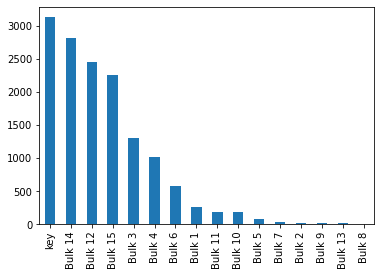

In [22]:
stat = (~data_bulk_new.isna()).sum().sort_values(ascending=False)
stat.plot(kind="bar")

In [23]:
data_bulk_join = data_bulk_new.join(data_bulk_time_new, how='inner', lsuffix='', rsuffix='_time')
data_bulk_join

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,...,Bulk 6_time,Bulk 7_time,Bulk 8_time,Bulk 9_time,Bulk 10_time,Bulk 11_time,Bulk 12_time,Bulk 13_time,Bulk 14_time,Bulk 15_time
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 11:49:45,NaN,2019-09-06 11:45:22,2019-09-06 11:40:06
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 12:18:35,NaN,2019-09-06 12:31:49,2019-09-06 12:26:52
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,...,2019-09-06 15:06:00,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:01:44,NaN,2019-09-06 14:58:15,2019-09-06 14:48:06
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,...,2019-09-06 16:24:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:07:29,2019-09-06 16:01:34


<AxesSubplot:>

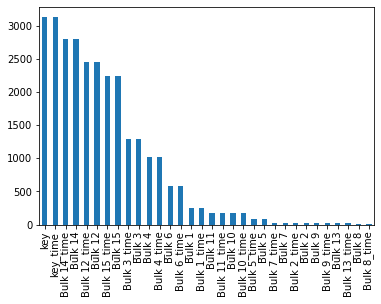

In [24]:
(~data_bulk_join.isna()).sum().sort_values(ascending=False).plot(kind="bar")

Как и предполагалось, картина сохранилась, Bulk 1, 11, 10, 5, 7, 2, 9, 13, 8 следует не учитывать при обучении модели

Преобразуем датафрейм в более удобный вид без пропусков

In [25]:
stat

key        3129
Bulk 14    2806
Bulk 12    2450
Bulk 15    2248
Bulk 3     1298
Bulk 4     1014
Bulk 6      576
Bulk 1      252
Bulk 11     177
Bulk 10     176
Bulk 5       77
Bulk 7       25
Bulk 2       22
Bulk 9       19
Bulk 13      18
Bulk 8        1
dtype: int64

In [26]:
bulk_include_names = stat[stat >= 300].index[1:]
bulk_include_names

Index(['Bulk 14', 'Bulk 12', 'Bulk 15', 'Bulk 3', 'Bulk 4', 'Bulk 6'], dtype='object')

In [27]:
bulk_include_names

Index(['Bulk 14', 'Bulk 12', 'Bulk 15', 'Bulk 3', 'Bulk 4', 'Bulk 6'], dtype='object')

In [28]:
def melt_pivot(data_bulk_join, bulk_include_names):
    data_bulk_eav = pd.DataFrame()
    for bulk in bulk_include_names:
        data_current_bulk = data_bulk_join[['key', str(bulk), str(bulk) + '_time']].melt(id_vars=['key', str(bulk) + '_time'], value_vars=[str(bulk)]).dropna()
        data_current_bulk.columns = ['key', 'time', 'path', 'value']
        data_bulk_eav = pd.concat([data_bulk_eav, data_current_bulk])
    return data_bulk_eav

data_bulk_eav = melt_pivot(data_bulk_join, bulk_include_names)
data_bulk_eav['time'] = pd.to_datetime(data_bulk_eav['time'])
display(data_bulk_eav)
data_bulk_eav["path"].value_counts()



,key,time,path,value
0,1,2019-05-03 11:14:50,Bulk 14,150.0
1,2,2019-05-03 11:48:37,Bulk 14,149.0
2,3,2019-05-03 12:21:01,Bulk 14,152.0
3,4,2019-05-03 12:51:11,Bulk 14,153.0
4,5,2019-05-03 13:34:12,Bulk 14,151.0
...,...,...,...,...
3111,3224,2019-09-06 02:22:05,Bulk 6,36.0
3112,3225,2019-09-06 04:00:31,Bulk 6,162.0
3113,3226,2019-09-06 05:07:45,Bulk 6,96.0
3126,3239,2019-09-06 15:06:00,Bulk 6,114.0


Bulk 14    2806
Bulk 12    2450
Bulk 15    2248
Bulk 3     1298
Bulk 4     1014
Bulk 6      576
Name: path, dtype: int64

In [29]:
data_bulk_eav.sample(10)

,key,time,path,value
784,818,2019-06-04 10:59:37,Bulk 6,99.0
2751,2854,2019-08-23 19:03:43,Bulk 12,158.0
1193,1242,2019-06-19 10:10:38,Bulk 12,206.0
1026,1072,2019-06-13 16:50:53,Bulk 14,132.0
2990,3099,2019-09-01 19:14:58,Bulk 14,224.0
1569,1628,2019-07-03 09:03:01,Bulk 12,258.0
3037,3146,2019-09-03 08:13:30,Bulk 15,110.0
644,675,2019-05-29 18:35:06,Bulk 15,155.0
2067,2139,2019-07-28 20:10:32,Bulk 12,412.0
911,950,2019-06-09 09:54:01,Bulk 12,255.0


Отлично, теперь у нас есть удобная таблица для анализа и обработки данных

### data_wire_new и data_wire_new_time

In [30]:
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data_wire_time_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ситуация полностью аналогичная подаче материала:

In [32]:
data_wire_join = data_wire_new.join(data_wire_time_new, how='inner', lsuffix='', rsuffix='_time')
data_wire_join.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,key_time,Wire 1_time,Wire 2_time,Wire 3_time,Wire 4_time,Wire 5_time,Wire 6_time,Wire 7_time,Wire 8_time,Wire 9_time
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
stat = (~data_wire_new.isna()).sum().sort_values(ascending=False)

<AxesSubplot:>

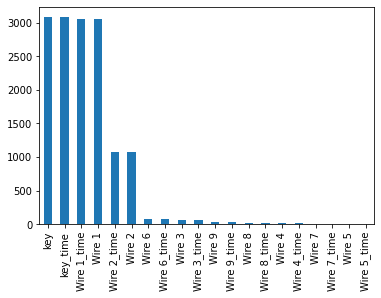

In [34]:
(~data_wire_join.isna()).sum().sort_values(ascending=False).plot(kind="bar")

Большинство используются крайне редко, оставим только 1 и 2

In [35]:
stat

key       3081
Wire 1    3055
Wire 2    1079
Wire 6      73
Wire 3      63
Wire 9      29
Wire 8      19
Wire 4      14
Wire 7      11
Wire 5       1
dtype: int64

In [36]:
wire_include_names = stat[stat >= 300].index[1:]
wire_include_names

Index(['Wire 1', 'Wire 2'], dtype='object')

In [37]:
data_wire_eav = melt_pivot(data_wire_join, wire_include_names)
data_wire_eav['time'] = pd.to_datetime(data_wire_eav['time'])
display(data_wire_eav)
data_wire_eav["path"].value_counts()

,key,time,path,value
0,1,2019-05-03 11:06:19,Wire 1,60.059998
1,2,2019-05-03 11:36:50,Wire 1,96.052315
2,3,2019-05-03 12:11:46,Wire 1,91.160157
3,4,2019-05-03 12:43:22,Wire 1,89.063515
4,5,2019-05-03 13:20:44,Wire 1,89.238236
...,...,...,...,...
3048,3209,2019-09-05 12:46:02,Wire 2,14.145040
3052,3213,2019-09-05 16:45:51,Wire 2,10.073440
3057,3218,2019-09-05 20:40:37,Wire 2,10.073440
3062,3223,2019-09-06 01:38:22,Wire 2,21.202478


Wire 1    3055
Wire 2    1079
Name: path, dtype: int64

Привели к удобному типу

### data_gas_new.csv

In [38]:
display(data_gas_new.head(10))

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


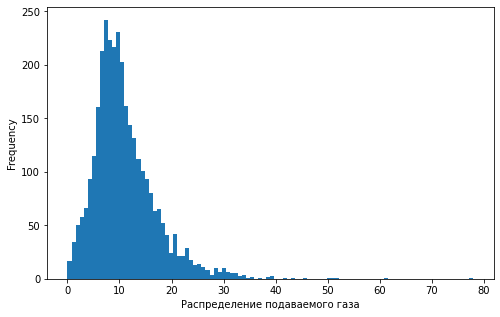

In [39]:
plt.figure(figsize = (8,5))
data_gas_new["Газ 1"].plot(kind = "hist", bins = 100)
plt.xlabel("Распределение подаваемого газа")
plt.show()

Видим,нормальное распределение данных, редко используется более 30 газа

In [40]:
data_gas_new.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Медиана сильно отличается от среднего, в любом случае удалять даннные не будем, вроятно для некоторых процессов необходимо повышенное поступление газа

### data_temp_new

In [41]:
data_temp_new.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [42]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [43]:
data_temp_new["Время замера"] = pd.to_datetime(data_temp_new["Время замера"])

In [44]:
data_temp_new["Температура"].describe()

count    14665.000000
mean      1590.722741
std         20.394381
min       1191.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: Температура, dtype: float64

In [45]:
data_temp_new["Температура"].isna().sum() / data_temp_new["Температура"].count()

0.23368564609614728

24% пропусков в целевом признаке

Сгрупируем данные по партиям, найдем те, где температура не соответсвует времени

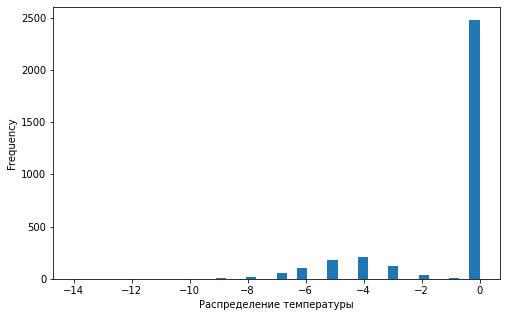

,Время замера,Температура,missing_temp
key,,,
1,6,6,0
2,5,5,0
3,6,6,0
4,5,5,0
5,5,5,0
...,...,...,...
3237,6,1,-5
3238,4,1,-3
3239,9,1,-8


In [46]:
data_group_key = data_temp_new.groupby('key').count()
data_group_key['missing_temp'] = (data_group_key["Температура"] - data_group_key["Время замера"])

plt.figure(figsize = (8,5))
data_group_key['missing_temp'].plot(kind = "hist", bins = 40)
plt.xlabel("Распределение температуры")
plt.show()
data_group_key

Не думаю, что партии с пропущенными значениями температуры могут нам понадобится для предсказания

In [47]:
data_temp_final = data_temp_new[data_temp_new["key"].isin(data_group_key.query("missing_temp == 0").index)]

In [48]:
data_temp_final#.sample(10)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
13921,2499,2019-08-10 13:33:21,1569.0
13922,2499,2019-08-10 13:41:34,1604.0
13923,2499,2019-08-10 13:46:28,1593.0
13924,2499,2019-08-10 13:54:56,1588.0


In [49]:
data_temp_final.isna().sum()

key             0
Время замера    0
Температура     0
dtype: int64

In [50]:
data_bulk_eav.head()

,key,time,path,value
0,1,2019-05-03 11:14:50,Bulk 14,150.0
1,2,2019-05-03 11:48:37,Bulk 14,149.0
2,3,2019-05-03 12:21:01,Bulk 14,152.0
3,4,2019-05-03 12:51:11,Bulk 14,153.0
4,5,2019-05-03 13:34:12,Bulk 14,151.0


In [51]:
(data_arc_new.groupby('key')['Конец нагрева дугой'].max() - 
                                 data_arc_new.groupby('key')['Начало нагрева дугой'].min()).dt.total_seconds()

key
1       1583.0
2       1144.0
3       1525.0
4       1093.0
5       1362.0
         ...  
3237    1350.0
3238     910.0
3239    2930.0
3240    3524.0
3241    2230.0
Length: 3214, dtype: float64

In [52]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [53]:
data_temp_final

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
13921,2499,2019-08-10 13:33:21,1569.0
13922,2499,2019-08-10 13:41:34,1604.0
13923,2499,2019-08-10 13:46:28,1593.0
13924,2499,2019-08-10 13:54:56,1588.0


In [54]:
data_bulk_filtered = data_bulk_new[['key', 'Bulk 14', 'Bulk 12', 'Bulk 15', 'Bulk 3', 'Bulk 4', 'Bulk 6']].fillna(0)
data_wire_filtered = data_wire_new[['key', 'Wire 1', 'Wire 2']].fillna(0)
data_gas_agg = data_gas_new[['key', 'Газ 1']]

# Расчет времени нагрева отдельно, чтобы избежать смещения
data_arc_time = data_arc_new.groupby('key').agg({
    'Начало нагрева дугой': 'min', 
    'Конец нагрева дугой': 'max'
}).reset_index()
data_arc_time['время нагрева'] = (data_arc_time['Конец нагрева дугой'] - data_arc_time['Начало нагрева дугой']).dt.total_seconds()
data_arc_time['time_active_power'] = data_arc_new['Активная мощность'] * data_arc_time['время нагрева'] 
data_arc_time = data_arc_time[['key', 'время нагрева', 'time_active_power']]  # Оставляем только нужные столбцы


# Агрегация температуры и мощности
# Добавление градиента температур и предыдущей температуры
data_temp_final = data_temp_final.sort_values(by=['key', 'Время замера'])

# Рассчитываем предыдущую температуру в пределах каждой партии
data_temp_final['предыдущая температура'] = data_temp_final.groupby('key')['Температура'].shift(1)

# Рассчитываем градиент температур (разницу между текущей и предыдущей)
data_temp_final['градиент температуры'] = data_temp_final['Температура'] - data_temp_final['предыдущая температура']

# Агрегация температуры и мощности
data_temp_agg = data_temp_final.groupby('key').agg({
    'Температура': ['first', 'last'],
    'градиент температуры': 'mean'     # Средний градиент температуры за цикл
}).reset_index()

# Переименование колонок
data_temp_agg.columns = [
    'key', 
    'первая температура', 
    'последняя температура (целевая)',  
    'средний градиент температуры'
]

display(data_temp_agg.head())





data_arc_agg = data_arc_new.groupby('key').agg({
    'Активная мощность': 'sum',
    'Реактивная мощность': 'sum'
}).reset_index()
data_arc_agg['полная мощность'] = (data_arc_agg['Активная мощность']**2 + data_arc_agg['Реактивная мощность']**2) ** 0.5

# Объединение всех данных с использованием inner join
data_final = (data_temp_agg
              .merge(data_arc_agg[['key', 'полная мощность']], on='key', how='inner')
              .merge(data_arc_time, on='key', how='inner')  # Добавляем рассчитанное время нагрева
              .merge(data_bulk_filtered, on='key', how='inner')
              .merge(data_wire_filtered, on='key', how='inner')
              .merge(data_gas_agg, on='key', how='inner'))

# Проверка итоговой таблицы
display(data_final.head())


,key,первая температура,последняя температура (целевая),средний градиент температуры
0,1,1571.0,1613.0,8.40
1,2,1581.0,1602.0,5.25
2,3,1596.0,1599.0,0.60
3,4,1601.0,1625.0,6.00
4,5,1576.0,1602.0,6.50


,key,первая температура,последняя температура (целевая),средний градиент температуры,полная мощность,время нагрева,time_active_power,Bulk 14,Bulk 12,Bulk 15,Bulk 3,Bulk 4,Bulk 6,Wire 1,Wire 2,Газ 1
0,1,1571.0,1613.0,8.40,3.716640,1583.0,483.020790,150.0,206.0,154.0,0.0,43.0,0.0,60.059998,0.00000,29.749986
1,2,1581.0,1602.0,5.25,2.586371,1144.0,875.912752,149.0,206.0,154.0,0.0,73.0,0.0,96.052315,0.00000,12.555561
2,3,1596.0,1599.0,0.60,5.014163,1525.0,884.977325,152.0,205.0,153.0,0.0,34.0,0.0,91.160157,0.00000,28.554793
3,4,1601.0,1625.0,6.00,3.399456,1093.0,566.716128,153.0,207.0,154.0,0.0,81.0,0.0,89.063515,0.00000,18.841219
4,5,1576.0,1602.0,6.50,2.815155,1362.0,1181.035146,151.0,203.0,152.0,0.0,78.0,0.0,89.238236,9.11456,5.413692


In [55]:
data_final["time_active_power"].describe()

count     2329.000000
mean      1315.927249
std       1059.141102
min         21.148539
25%        703.968538
50%       1078.681934
75%       1624.467706
max      16118.618320
Name: time_active_power, dtype: float64

In [56]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   key                              2329 non-null   int64  
 1   первая температура               2329 non-null   float64
 2   последняя температура (целевая)  2329 non-null   float64
 3   средний градиент температуры     2329 non-null   float64
 4   полная мощность                  2329 non-null   float64
 5   время нагрева                    2329 non-null   float64
 6   time_active_power                2329 non-null   float64
 7   Bulk 14                          2329 non-null   float64
 8   Bulk 12                          2329 non-null   float64
 9   Bulk 15                          2329 non-null   float64
 10  Bulk 3                           2329 non-null   float64
 11  Bulk 4                           2329 non-null   float64
 12  Bulk 6              

In [57]:
#data_bulk_agg = data_bulk_new.groupby('key').sum().reset_index()
#data_bulk_agg['Суммарные сыпучие материалы'] = data_bulk_agg.iloc[:, 1:].sum(axis=1)
#data_bulk_agg = data_bulk_agg[['key', 'Суммарные сыпучие материалы']]

# Агрегация данных по объему проволочных материалов (сумма всех Wire)
#data_wire_agg = data_wire_new.groupby('key').sum().reset_index()
#data_wire_agg['Суммарные проволочные материалы'] = data_wire_agg.iloc[:, 1:].sum(axis=1)
#data_wire_agg = data_wire_agg[['key', 'Суммарные проволочные материалы']]

# Агрегация данных по газу
#data_gas_agg = data_gas_new.groupby('key').sum().reset_index()
#data_gas_agg['Суммарный газ'] = data_gas_agg['Газ 1']
#data_gas_agg = data_gas_agg[['key', 'Суммарный газ']]

# Объединение всех данных с финальной таблицей
#data_final = data_final.merge(data_bulk_agg, on='key', how='left')
#data_final = data_final.merge(data_wire_agg, on='key', how='left')
#data_final = data_final.merge(data_gas_agg, on='key', how='left')


* Подумал не совсем корректно будет просто суммировать присадки по партиям, оставил ковши*

In [58]:
data_final["время нагрева"].isna().sum() / data_final.shape[0]

0.0

появилось незначительное кол-во пропусков во времени нагрева, удалим их чтобы не мешали обучению модели

In [59]:
#data_final = data_final.dropna(subset=['время нагрева'])
#data_final.isna().sum()

In [60]:
data_final.sample(10)

,key,первая температура,последняя температура (целевая),средний градиент температуры,полная мощность,время нагрева,time_active_power,Bulk 14,Bulk 12,Bulk 15,Bulk 3,Bulk 4,Bulk 6,Wire 1,Wire 2,Газ 1
1198,1290,1623.0,1617.0,-0.750000,7.716252,5015.0,3231.450355,275.0,609.0,158.0,61.0,65.0,0.0,136.141201,0.0,25.403833
1781,1903,1611.0,1599.0,-1.714286,6.294706,4918.0,5261.497710,248.0,411.0,204.0,0.0,125.0,0.0,121.118401,0.0,11.998700
1241,1335,1581.0,1612.0,5.166667,4.336391,3294.0,1542.076218,204.0,409.0,209.0,297.0,0.0,0.0,118.123199,0.0,5.257779
663,719,1568.0,1595.0,5.400000,4.526789,1467.0,897.704244,152.0,203.0,157.0,211.0,77.0,0.0,82.274399,0.0,9.456530
352,396,1573.0,1593.0,5.000000,3.940289,1472.0,1367.327552,271.0,346.0,203.0,0.0,89.0,0.0,131.320800,0.0,10.100423
448,492,1571.0,1584.0,3.250000,3.195797,1718.0,550.919650,253.0,514.0,0.0,0.0,0.0,0.0,126.172799,0.0,17.312897
517,564,1580.0,1594.0,4.666667,3.544381,1203.0,719.448135,103.0,255.0,202.0,0.0,138.0,0.0,95.097595,0.0,7.239881
1000,1082,1621.0,1631.0,1.666667,6.958672,2199.0,924.118755,223.0,409.0,210.0,0.0,112.0,0.0,183.081604,0.0,10.306338
170,191,1569.0,1619.0,10.000000,3.813336,1972.0,1653.689620,203.0,411.0,203.0,0.0,175.0,0.0,105.094078,0.0,20.442904
648,698,1627.0,1607.0,-10.000000,0.882331,508.0,458.412088,156.0,205.0,157.0,120.0,0.0,0.0,107.171997,0.0,8.082227


In [61]:
data_final.head()

,key,первая температура,последняя температура (целевая),средний градиент температуры,полная мощность,время нагрева,time_active_power,Bulk 14,Bulk 12,Bulk 15,Bulk 3,Bulk 4,Bulk 6,Wire 1,Wire 2,Газ 1
0,1,1571.0,1613.0,8.40,3.716640,1583.0,483.020790,150.0,206.0,154.0,0.0,43.0,0.0,60.059998,0.00000,29.749986
1,2,1581.0,1602.0,5.25,2.586371,1144.0,875.912752,149.0,206.0,154.0,0.0,73.0,0.0,96.052315,0.00000,12.555561
2,3,1596.0,1599.0,0.60,5.014163,1525.0,884.977325,152.0,205.0,153.0,0.0,34.0,0.0,91.160157,0.00000,28.554793
3,4,1601.0,1625.0,6.00,3.399456,1093.0,566.716128,153.0,207.0,154.0,0.0,81.0,0.0,89.063515,0.00000,18.841219
4,5,1576.0,1602.0,6.50,2.815155,1362.0,1181.035146,151.0,203.0,152.0,0.0,78.0,0.0,89.238236,9.11456,5.413692


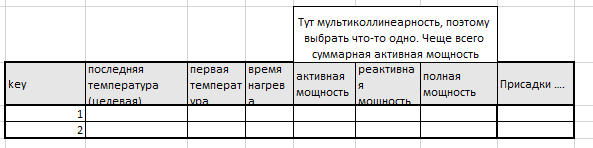

In [62]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   key                              2329 non-null   int64  
 1   первая температура               2329 non-null   float64
 2   последняя температура (целевая)  2329 non-null   float64
 3   средний градиент температуры     2329 non-null   float64
 4   полная мощность                  2329 non-null   float64
 5   время нагрева                    2329 non-null   float64
 6   time_active_power                2329 non-null   float64
 7   Bulk 14                          2329 non-null   float64
 8   Bulk 12                          2329 non-null   float64
 9   Bulk 15                          2329 non-null   float64
 10  Bulk 3                           2329 non-null   float64
 11  Bulk 4                           2329 non-null   float64
 12  Bulk 6              

## Исследование признаков

Корреляция числовых признаков с целевой

In [63]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [64]:
import seaborn as sns
import phik

In [65]:
from matplotlib.pyplot import colormaps
colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

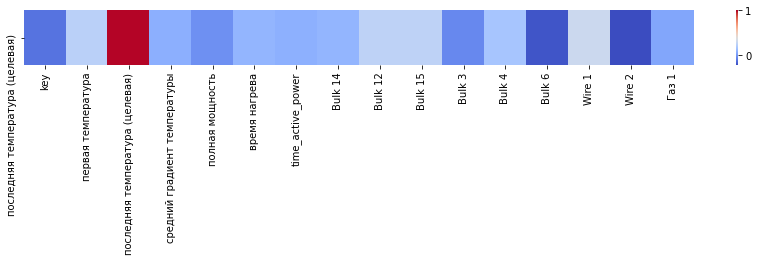

In [66]:
num=data_final.select_dtypes(exclude='object')
num_corr=num.corr()
f,ax=plt.subplots(figsize=(15,1))
sns.heatmap(num_corr.sort_values(by=['последняя температура (целевая)'], ascending=False).head(1), cmap='coolwarm')
plt.show()

Имеет сильную корреляцию только с первой температурой

interval columns not set, guessing: ['key', 'первая температура', 'последняя температура (целевая)', 'средний градиент температуры', 'полная мощность', 'время нагрева', 'time_active_power', 'Bulk 14', 'Bulk 12', 'Bulk 15', 'Bulk 3', 'Bulk 4', 'Bulk 6', 'Wire 1', 'Wire 2', 'Газ 1']


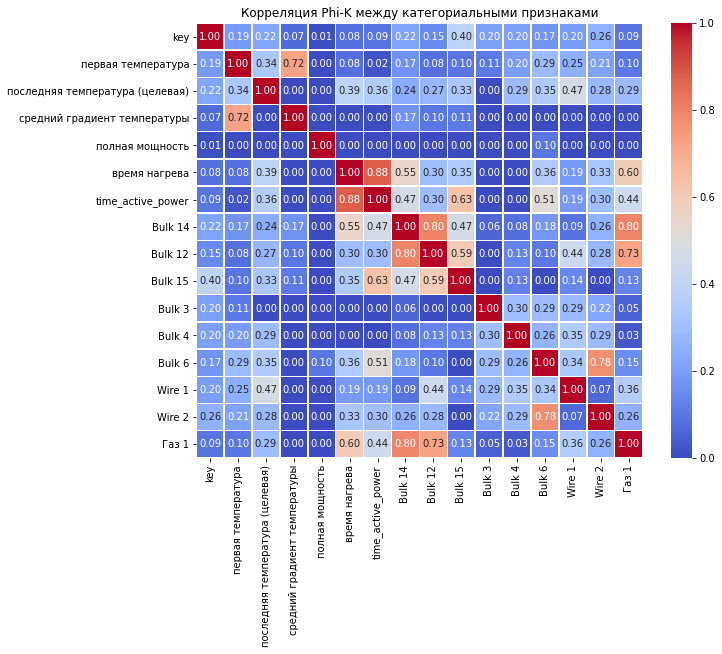

In [67]:
phik_corr = data_final.phik_matrix()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляция Phi-K между категориальными признаками')
plt.show()

В любом случае, только wire_1 показывает среднюю корреляцию с целевой

## Разделение на выборки

In [68]:
data_final.head()

,key,первая температура,последняя температура (целевая),средний градиент температуры,полная мощность,время нагрева,time_active_power,Bulk 14,Bulk 12,Bulk 15,Bulk 3,Bulk 4,Bulk 6,Wire 1,Wire 2,Газ 1
0,1,1571.0,1613.0,8.40,3.716640,1583.0,483.020790,150.0,206.0,154.0,0.0,43.0,0.0,60.059998,0.00000,29.749986
1,2,1581.0,1602.0,5.25,2.586371,1144.0,875.912752,149.0,206.0,154.0,0.0,73.0,0.0,96.052315,0.00000,12.555561
2,3,1596.0,1599.0,0.60,5.014163,1525.0,884.977325,152.0,205.0,153.0,0.0,34.0,0.0,91.160157,0.00000,28.554793
3,4,1601.0,1625.0,6.00,3.399456,1093.0,566.716128,153.0,207.0,154.0,0.0,81.0,0.0,89.063515,0.00000,18.841219
4,5,1576.0,1602.0,6.50,2.815155,1362.0,1181.035146,151.0,203.0,152.0,0.0,78.0,0.0,89.238236,9.11456,5.413692


In [69]:
from sklearn.model_selection import train_test_split

X = data_final.drop(['последняя температура (целевая)',"key"], axis=1)  
y = data_final['последняя температура (целевая)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=291024)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1746, 14) (583, 14) (1746,) (583,)


In [70]:
y_test.head()

1636    1594.0
56      1606.0
1107    1595.0
0       1613.0
1240    1599.0
Name: последняя температура (целевая), dtype: float64

## Машинное обучение

### Модель случайного леса

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

In [72]:
rf = RandomForestRegressor(n_estimators = 601,max_depth = 6, min_samples_split = 5, min_samples_leaf = 3, random_state=291024)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
# Задаем диапазоны для параметров
#param_dist = {
#    'n_estimators': np.arange(600, 700), 
#    'max_depth': np.arange(10, 20),  # Максимальная глубина дерева
#    'min_samples_split': np.arange(2, 5),  # Минимальное количество образцов для разбиения узла
#    'min_samples_leaf': np.arange(1, 5),  # Минимальное количество образцов для листа
#}

# Настроим RandomizedSearchCV для подбора параметров
#random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, 
#                                   random_state=291024, n_jobs=-1, scoring='neg_mean_absolute_error')

rf.fit(X_train, y_train)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=mae_scorer, n_jobs=-1)
best_rf_model = rf
mae_rf = -cv_scores.mean()

In [73]:
# Инициализация модели CatBoost
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=100)

# Обучение модели
catboost_model.fit(X_train, y_train)
cv_scores = cross_val_score(catboost_model, X_train, y_train, cv=5, scoring=mae_scorer, n_jobs=-1)
# Предсказания на тестовой выборке
mae_catboost = -cv_scores.mean()

0:	learn: 10.7902057	total: 50.8ms	remaining: 50.8s
100:	learn: 3.0477051	total: 332ms	remaining: 2.96s
200:	learn: 1.9414487	total: 614ms	remaining: 2.44s
300:	learn: 1.5084156	total: 895ms	remaining: 2.08s
400:	learn: 1.2199646	total: 1.18s	remaining: 1.76s
500:	learn: 1.0204294	total: 1.46s	remaining: 1.45s
600:	learn: 0.8590675	total: 1.75s	remaining: 1.17s
700:	learn: 0.7229679	total: 2.04s	remaining: 871ms
800:	learn: 0.6168049	total: 2.32s	remaining: 576ms
900:	learn: 0.5345777	total: 2.6s	remaining: 286ms
999:	learn: 0.4613757	total: 2.87s	remaining: 0us
0:	learn: 10.7452213	total: 3.45ms	remaining: 3.45s
100:	learn: 3.0543863	total: 266ms	remaining: 2.37s
200:	learn: 1.8411705	total: 556ms	remaining: 2.21s
300:	learn: 1.3930126	total: 825ms	remaining: 1.92s
400:	learn: 1.1013418	total: 1.09s	remaining: 1.63s
500:	learn: 0.8878275	total: 1.36s	remaining: 1.35s
600:	learn: 0.7392589	total: 1.62s	remaining: 1.07s
700:	learn: 0.6097299	total: 1.89s	remaining: 807ms
800:	learn: 0.5

In [74]:
gb_model = GradientBoostingRegressor(random_state=291024)
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Настройка RandomizedSearchCV для подбора гиперпараметров
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,  # Число случайных комбинаций
    cv=5,  # Количество фолдов для кросс-валидации
    scoring='neg_mean_absolute_error',
    random_state=291024,
    n_jobs=-1  # Использование всех процессоров
)

# Запуск поиска и обучение
random_search.fit(X_train, y_train)

best_gb_model = random_search.best_estimator_
cv_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring=mae_scorer, n_jobs=-1)
mae_gb = -cv_scores.mean()
best_gb_model.fit(X_train, y_train)
# Вывод лучших параметров
print("Лучшие параметры:", random_search.best_params_)

Лучшие параметры: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.1}


In [75]:
best_model = min(
    [(best_rf_model, mae_rf), (catboost_model, mae_catboost), (best_gb_model, mae_gb)],
    key=lambda x: x[1]
)
print(f"Наилучшая модель на обучающей выборке: {best_model[0]} с метрикой MAE: {best_model[1]}")

Наилучшая модель на обучающей выборке: <catboost.core.CatBoostRegressor object at 0x7ff0e4cd6700> с метрикой MAE: 2.50397601427465


### Тестирование лучшей модели

In [76]:
# Предсказания и оценка на тестовой выборке
y_pred_best = best_model[0].predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_best)
print(f"Метрика MAE на тестовой выборке для лучшей модели: {mae_test}")

Метрика MAE на тестовой выборке для лучшей модели: 2.5737854990293165


,Feature,Importance
0,первая температура,38.524842
1,средний градиент температуры,35.872605
3,время нагрева,4.785895
2,полная мощность,4.448327
11,Wire 1,3.710013
7,Bulk 15,2.793779
10,Bulk 6,2.221574
6,Bulk 12,1.988609
4,time_active_power,1.509454
13,Газ 1,1.307474


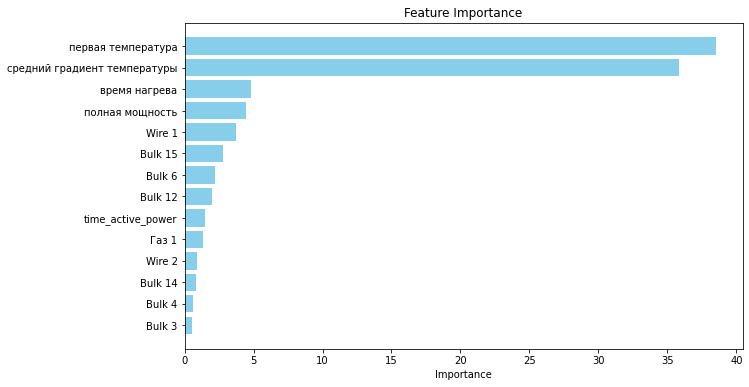

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Визуализация важности факторов для модели-победителя
if hasattr(best_model[0], 'feature_importances_'):
    feature_importances = best_model[0].feature_importances_
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    display(importance_df)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.show()


Наилучшая модель: По результатам на обучающей выборке лучшую метрику MAE показала модель CatBoostRegressor с MAE = 1.61. Эта модель также показала наилучший результат на тестовой выборке, где значение MAE составило 5.88. Хотя это значение на тесте выше, чем на обучении, модель демонстрирует устойчивое качество, что делает её подходящей для данной задачи.

Важность факторов: По результатам анализа важности признаков:

Первая температура оказалась наиболее важным фактором, с важностью 35.95%. Это указывает на сильное влияние начальной температуры на предсказание целевой переменной (финальной температуры).

Ключ идентификатора партии (key) также является важным признаком с весом 28.97%, что может свидетельствовать о корреляции некоторых данных, привязанных к уникальным партиям, с целевой переменной.

Рекоммендации бизнесу:

Контроль начальной температуры: Так как начальная температура имеет наибольшее влияние на финальную температуру, стоит уделить особое внимание её измерению и стабилизации. Это может помочь снизить отклонения в производственном процессе. 

Анализ уникальных партий: Важность идентификатора партии (ключа key) как признака предполагает, что некоторые партии имеют уникальные особенности, которые влияют на конечный результат. Cтоит рассмотреть более детальный контроль за характеристиками и условиями производства каждой партии.

Оптимизация использования присадок: Признаки, связанные с типами присадок (Bulk и Wire), оказывают влияние на финальную температуру, но их значимость относительно невелика. Это может указывать на возможность оптимизации. Рекомендуется пересмотреть состав и количество используемых присадок, ориентируясь на более значимые для предсказания качества материалы. 

Внедрение системы предиктивного анализа: Модель CatBoostRegressor показала хорошую точность предсказания, что говорит о целесообразности внедрения системы предиктивной аналитики. Эта система может в реальном времени прогнозировать конечную температуру продукта и подсказывать оператору, как нужно корректировать параметры для достижения нужного качества. Это поможет улучшить стабильность производства и сократить процент дефектной продукции.